<a href="https://colab.research.google.com/github/AnushkaMazumdar2/Machine_Learning/blob/main/2348505_Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING THE NECESSARY LIBRARIES**

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict,train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score,confusion_matrix
from sklearn import tree

In [178]:
#Importing the Dataset
data = pd.read_csv("/content/employee_data (1) 2.csv")

In [3]:
data.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14249 entries, 0 to 14248
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14249 non-null  int64  
 1   department         13540 non-null  object 
 2   filed_complaint    2058 non-null   float64
 3   last_evaluation    12717 non-null  float64
 4   n_projects         14249 non-null  int64  
 5   recently_promoted  300 non-null    float64
 6   salary             14249 non-null  object 
 7   satisfaction       14068 non-null  float64
 8   status             14249 non-null  object 
 9   tenure             14068 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.1+ MB


In [34]:
data.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
count,14249.000000,2058.0,12717.000000,14249.000000,300.0,14068.000000,14068.000000
mean,199.795775,1.0,0.718477,3.773809,1.0,0.621295,3.497228
std,50.998714,0.0,0.173062,1.253126,0.0,0.250469,1.460917
min,49.000000,1.0,0.316175,1.000000,1.0,0.040058,2.000000
25%,155.000000,1.0,0.563866,3.000000,1.0,0.450390,3.000000
50%,199.000000,1.0,0.724939,4.000000,1.0,0.652527,3.000000
75%,245.000000,1.0,0.871358,5.000000,1.0,0.824951,4.000000
max,310.000000,1.0,1.000000,7.000000,1.0,1.000000,10.000000


In [35]:
data.shape

(14249, 10)

**MISSING VALUE DETECTION AND IMPUTATION**

In [36]:
data.isnull().sum()

avg_monthly_hrs          0
department             709
filed_complaint      12191
last_evaluation       1532
n_projects               0
recently_promoted    13949
salary                   0
satisfaction           181
status                   0
tenure                 181
dtype: int64

In [4]:
data['filed_complaint'].fillna(0,inplace=True)

In [5]:
data['recently_promoted'].fillna(0,inplace=True)

In [6]:
data['department'] = data['department'].fillna(data['department'].mode()[0])

In [7]:
miss = data[['last_evaluation','satisfaction','tenure']]
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
df = imputer.fit_transform(miss)

In [8]:
df1 = pd.DataFrame(df,columns=miss.columns)

In [9]:
data = data.drop(columns = ['last_evaluation','satisfaction','tenure'])

In [17]:
data1 = data.join(df1)

In [11]:
data1.head()

,avg_monthly_hrs,department,filed_complaint,n_projects,recently_promoted,salary,status,last_evaluation,satisfaction,tenure
0,221,engineering,0.0,4,0.0,low,Left,0.932868,0.829896,5.0
1,232,support,0.0,3,0.0,low,Employed,0.586962,0.834544,2.0
2,184,sales,0.0,3,0.0,medium,Employed,0.788830,0.834988,3.0
3,206,sales,0.0,4,0.0,low,Employed,0.575688,0.424764,2.0
4,249,sales,0.0,3,0.0,low,Employed,0.845217,0.779043,3.0


In [12]:
data1.isnull().sum()

avg_monthly_hrs      0
department           0
filed_complaint      0
n_projects           0
recently_promoted    0
salary               0
status               0
last_evaluation      0
satisfaction         0
tenure               0
dtype: int64

In [13]:
data1.describe()

,avg_monthly_hrs,filed_complaint,n_projects,recently_promoted,last_evaluation,satisfaction,tenure
count,14249.000000,14249.000000,14249.000000,14249.000000,14249.000000,14249.000000,14249.000000
mean,199.795775,0.144431,3.773809,0.021054,0.714922,0.621295,3.497228
std,50.998714,0.351539,1.253126,0.143570,0.167660,0.248873,1.451608
min,49.000000,0.000000,1.000000,0.000000,0.316175,0.040058,2.000000
25%,155.000000,0.000000,3.000000,0.000000,0.568392,0.453588,3.000000
50%,199.000000,0.000000,4.000000,0.000000,0.718477,0.647489,3.000000
75%,245.000000,0.000000,5.000000,0.000000,0.860217,0.822709,4.000000
max,310.000000,1.000000,7.000000,1.000000,1.000000,1.000000,10.000000


**1. EXPLORATORY DATA ANALYSIS**

<Axes: xlabel='tenure', ylabel='Count'>

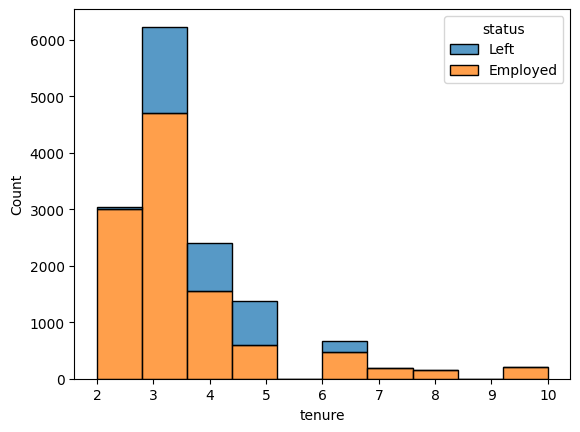

In [14]:
# Histogram to plot Employee Tenure with regards to Employee Status
sns.histplot(data1,x="tenure", hue="status",multiple='stack',bins=10)

<Axes: title={'center': 'satisfaction'}, xlabel='status'>

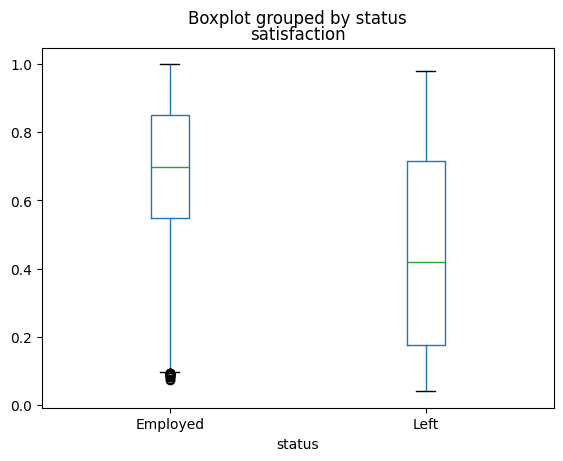

In [179]:
#Boxplot to visualise Employee Satisfaction scores in regads to their Status
data.boxplot(by ='status', column =['satisfaction'], grid = False)

In [19]:
#Label Encoding the data because string values cannot be used to plot numerical charts
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data1['status'] = le.fit_transform(data1['status'])
data1['salary'] = le.fit_transform(data1['salary'])

In [20]:
data1.head()

,avg_monthly_hrs,department,filed_complaint,n_projects,recently_promoted,salary,status,last_evaluation,satisfaction,tenure
0,221,engineering,0.0,4,0.0,low,1,0.932868,0.829896,5.0
1,232,support,0.0,3,0.0,low,0,0.586962,0.834544,2.0
2,184,sales,0.0,3,0.0,medium,0,0.788830,0.834988,3.0
3,206,sales,0.0,4,0.0,low,0,0.575688,0.424764,2.0
4,249,sales,0.0,3,0.0,low,0,0.845217,0.779043,3.0


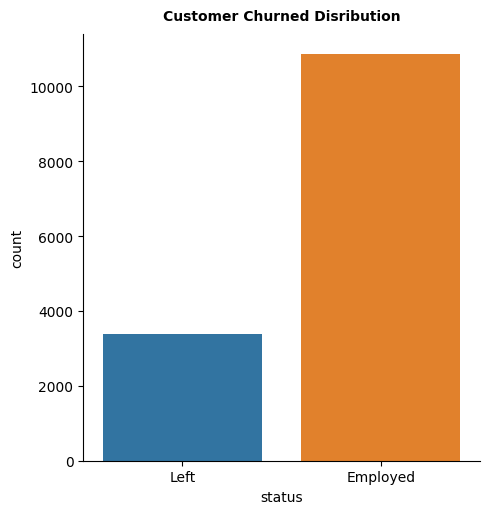

In [24]:
sns.catplot(x ="status",kind ="count", data=data)
plt.title("Customer Churned Disribution",fontweight="black",size=10,pad=10)
plt.show()

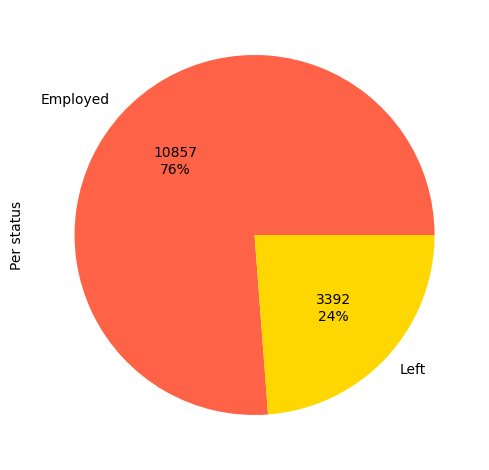

In [23]:
#Pie chart to Visualise the distribution of Employee Status
def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'
label = ['Employed','Left']
data1.groupby('status').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 10},colors=['tomato', 'gold'],labels=label)
plt.ylabel('Per status')
plt.tight_layout()
plt.show()

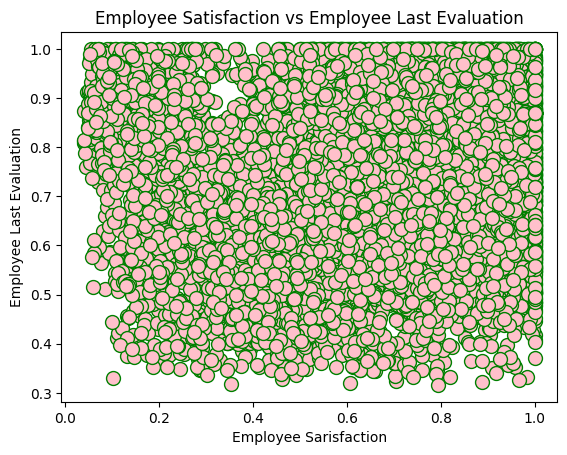

In [38]:
#Plotting a scatter plot for Employee Satisfaction vs their Last Evaluation
plt.scatter(data1['satisfaction'],data1['last_evaluation'],c='pink',edgecolor='green',s=100)
plt.xlabel("Employee Sarisfaction")
plt.ylabel("Employee Last Evaluation")
plt.title("Employee Satisfaction vs Employee Last Evaluation")
plt.show()

We can see there is a positive correlation between Employee Satisfaction and Employee Last Evaluation

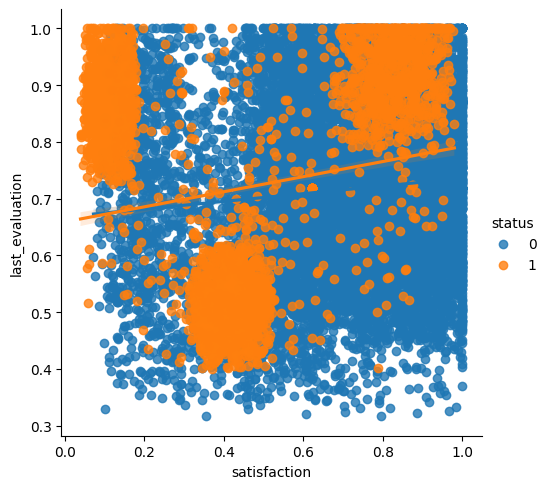

In [42]:
#"lmplot" also known as linear model plot, plots a line of best fit for our scatterplot
sns.lmplot(x='satisfaction',y='last_evaluation',hue='status',data=data1)

Judging by the line of best fit, we can again confirm that there is a positive correlation between satisfaction and last_Evaluation

In [50]:
#Calculating the correlation between satisfaction and last_evaluation
d = data1[['satisfaction','last_evaluation']]
d.corr()

,satisfaction,last_evaluation
satisfaction,1.000000,0.107262
last_evaluation,0.107262,1.000000


**2. Decision Tree Modeling with Tree Pruning and Split Criteria:**

In [139]:
#Splitting the datasets into train and test datasets with 80-20 ratio
x = data1.drop(columns=["status","filed_complaint","recently_promoted","department","avg_monthly_hrs"])
y = data1["status"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20)

GINI IMPURITY

In [180]:
dtreeg = DecisionTreeClassifier(criterion='gini',splitter='best')
dtreeg.fit(x_train,y_train)

DecisionTreeClassifier()

In [181]:
y_test_pred_g = dtreeg.predict(x_test)
print("Accuracy Score of Model on Testing Data  is =>",round(accuracy_score(y_test,y_test_predg)*100,2),"%")

Accuracy Score of Model on Testing Data  is => 94.28 %


ENTROPY

In [183]:
dtree_e = DecisionTreeClassifier(criterion='entropy',splitter='best')
dtree_e.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [184]:
y_pred_e = dtree_e.predict(x_test)
print("Accuracy Score of Model on Testing Data  is =>",round(accuracy_score(y_test,y_pred_e)*100,2),"%")

Accuracy Score of Model on Testing Data  is => 94.21 %


Here, we can see that Gini Impurity has performed a bit better than Entropy

In [92]:
#Importing Graphviz for decision tree visualization
import graphviz

In [185]:
dot_data = tree.export_graphviz(dtreeg, out_file=None,
                                feature_names= ['n_projects','satisfaction','tenure','last_evaluation','salary'],
                                class_names = ['Left','Employed'],
                                filled=True)

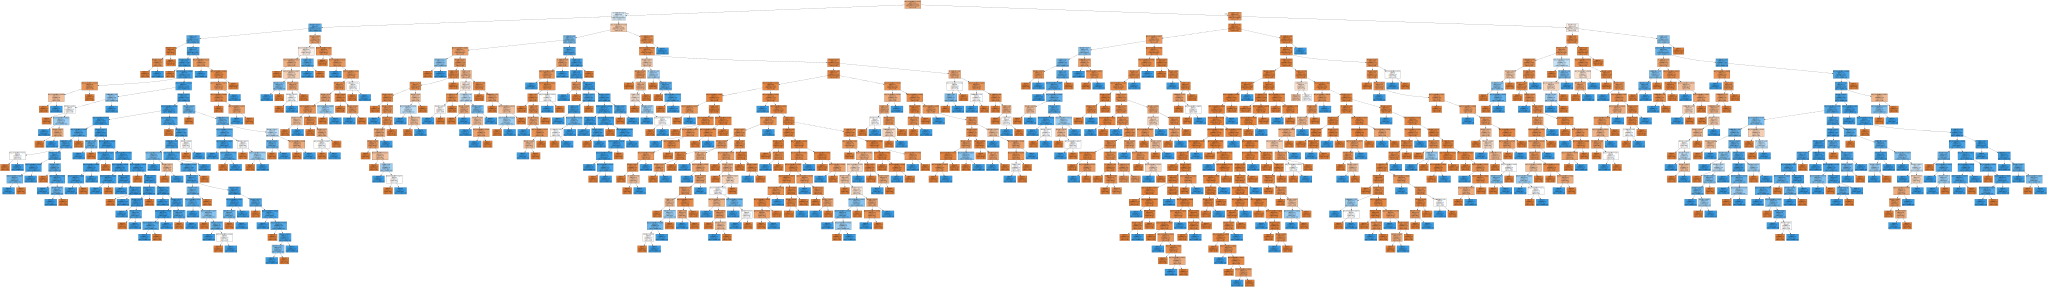

In [186]:
graphviz.Source(dot_data, format="png")

PLOTTING CONFUSION MATRIX

In [119]:
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,yticklabels=['Employed','Left']
               ,xticklabels=['Employed','Left'],cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

Test Confusion matrix


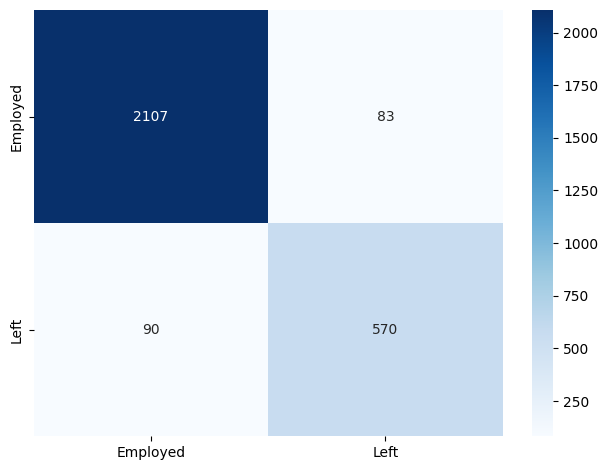

In [191]:
plot_confusionmatrix(y_test_pred_g,y_test,dom='Test')

**2. DECISION TREE MODELLING WITH TREE PRUNING AND SPLIT CRITERIA**

COST-COMPLEXITY (CHOOSING THE OPTIMAL ALPHA)

In [148]:
path = dtree.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [122]:
# For each alpha we will append our model to a list
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)

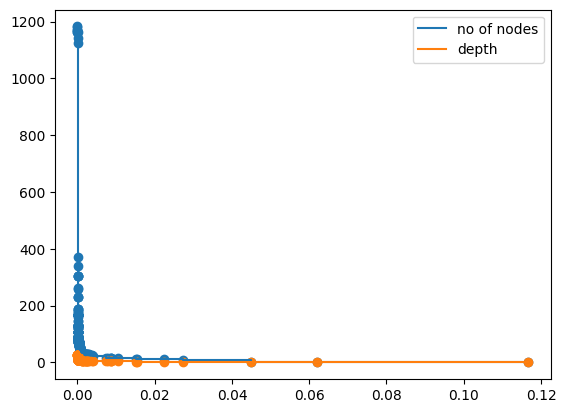

In [123]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

*Alpha is decreasing with increasing with number of nodes and depth*

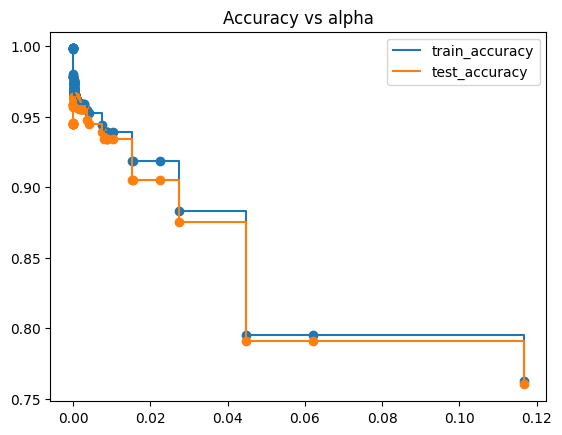

In [124]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(x_train)
    y_test_pred = c.predict(x_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))
plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

This plot shows the relation of accuracy(training and testing) with alpha. As alpha is decreasing, the accuracy is increasing. The optimal alpha value seems to be 0.005

Train score 0.9424510922010703
Test score 0.9428070175438596
Test Confusion matrix


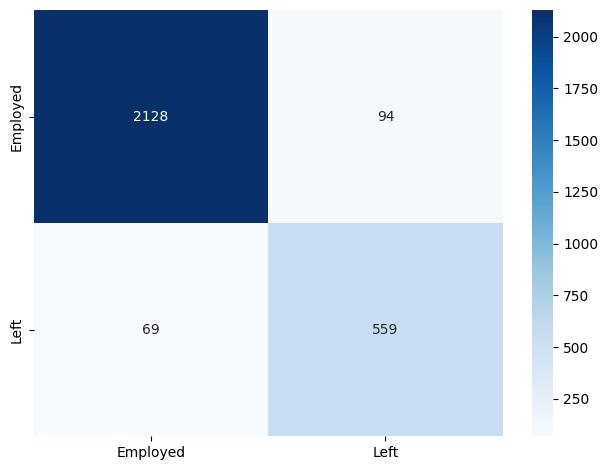

In [160]:
#Training the Decision Tree Classifier model with our optimal alpha value with gini impurity
clf_g = tree.DecisionTreeClassifier(criterion="gini",random_state=0,ccp_alpha=0.005)
clf_g.fit(x_train,y_train)
y_train_pred = clf_g.predict(x_train)
y_test_predg = clf_g.predict(x_test)
#Plotting the Confusion Matrix
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_predg,y_test)}')
plot_confusionmatrix(y_test_predg,y_test,dom='Test')

Train score 0.958943766997105
Test score 0.9585964912280702
Test Confusion matrix


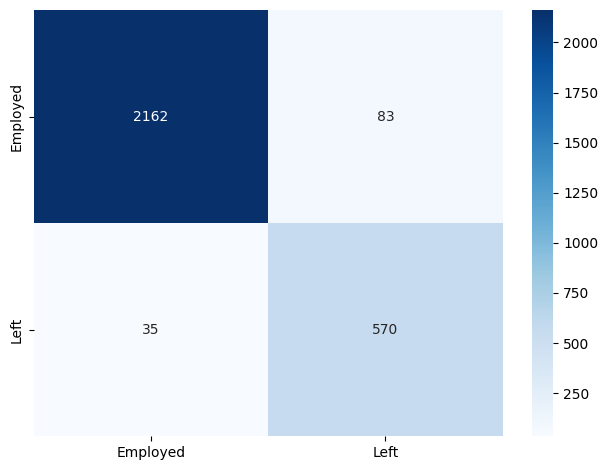

In [161]:
#Training the Decision Tree Classifier model with our optimal alpha value with entropy
clf_e = tree.DecisionTreeClassifier(criterion="entropy",random_state=0,ccp_alpha=0.005)
clf_e.fit(x_train,y_train)
y_train_prede = clf_e.predict(x_train)
y_test_prede = clf_e.predict(x_test)
#Plotting the accuracy and confusion matrix
print(f'Train score {accuracy_score(y_train_prede,y_train)}')
print(f'Test score {accuracy_score(y_test_prede,y_test)}')
plot_confusionmatrix(y_test_prede,y_test,dom='Test')

Here, the accuracy of the entropy criterion is more than the accuracy of the gini criterion

PLOTTING THE DECISION TREE POST PRUNING

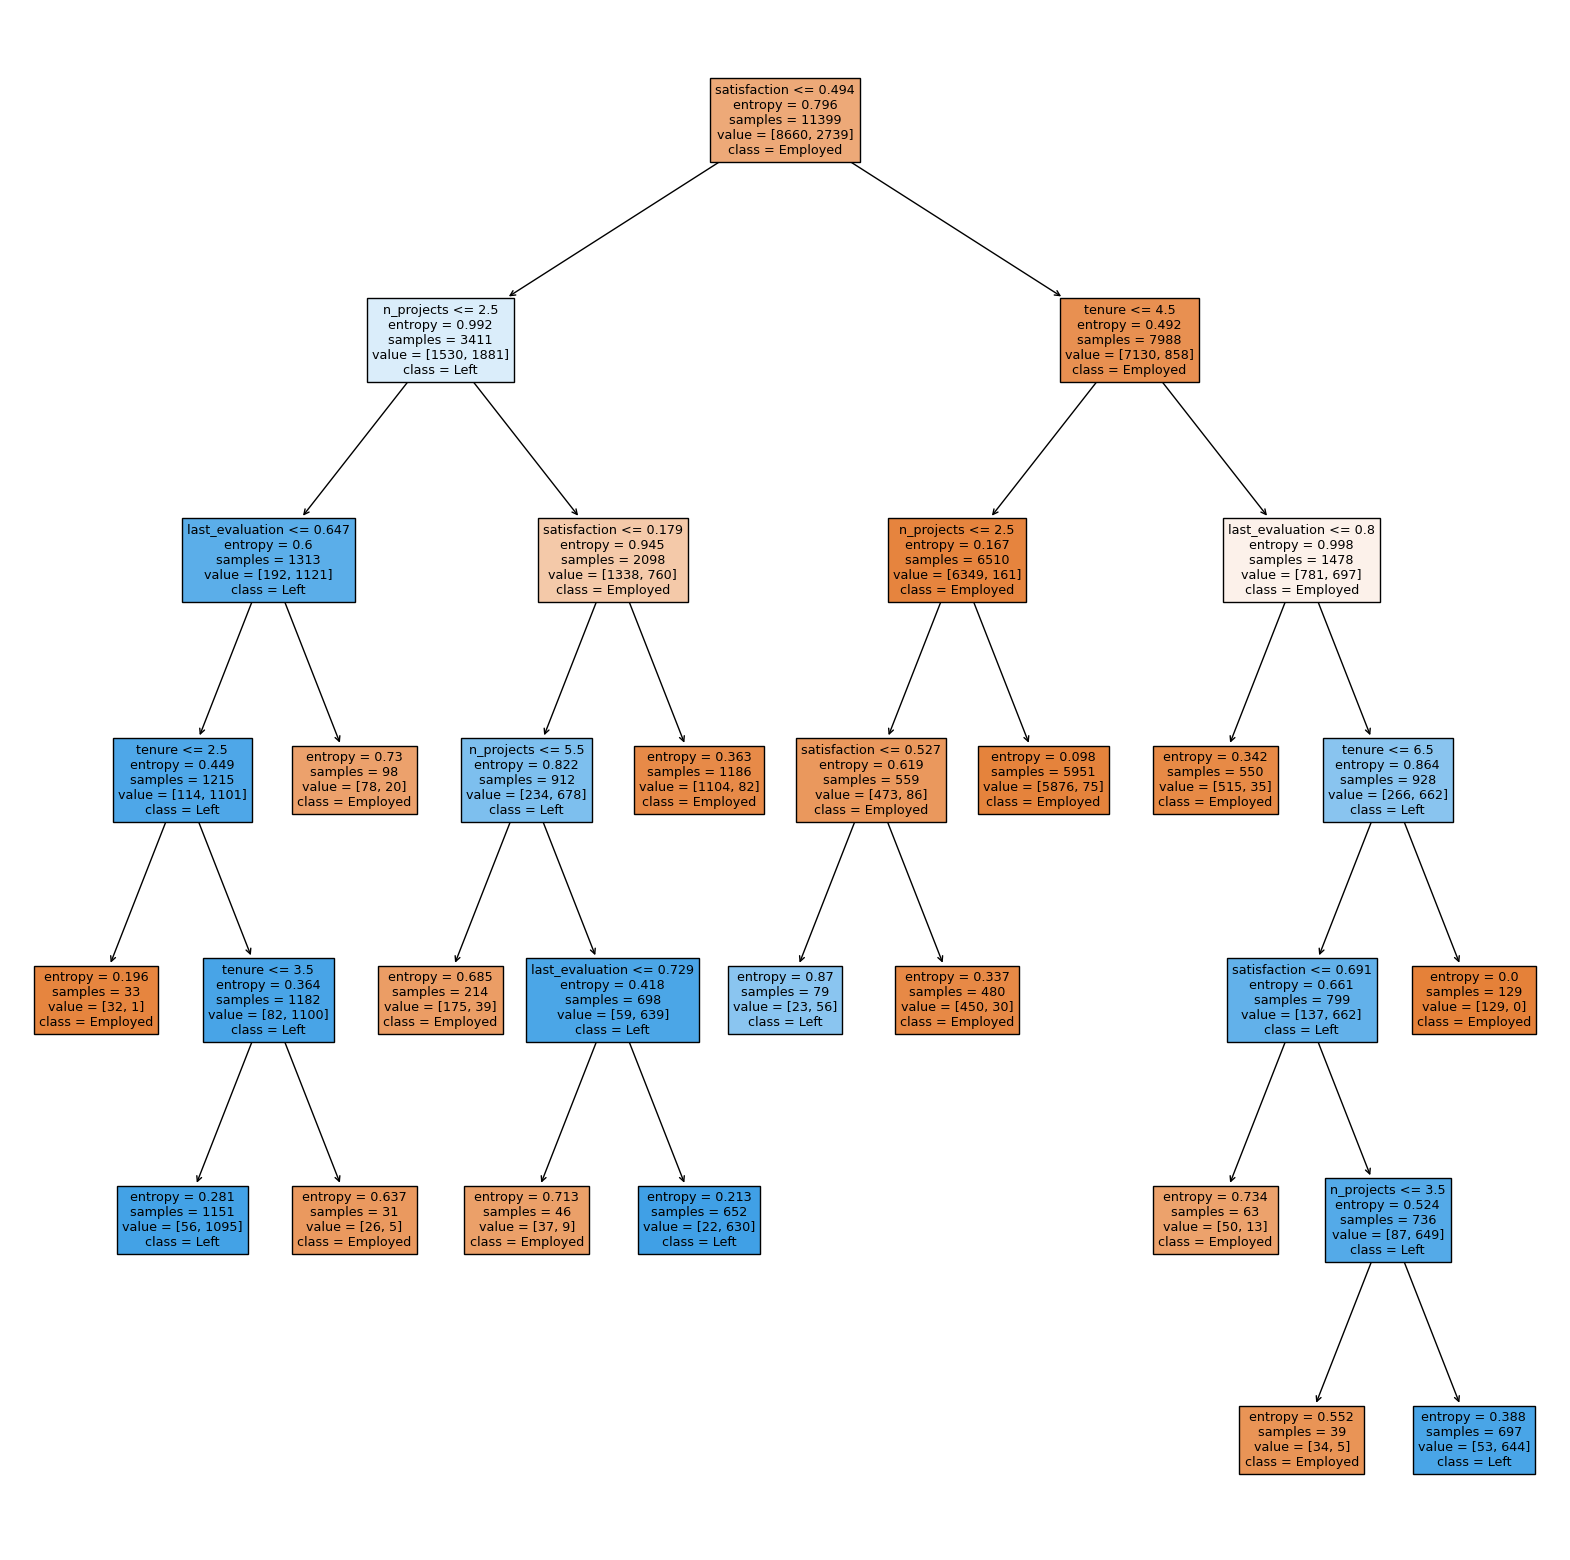

In [156]:
plt.figure(figsize=(20,20))
features = x_train.columns
classes = ['Employed','Left']
tree.plot_tree(clf_e,feature_names=features,class_names=classes,filled=True)
plt.show()

We can see that the tree is less complex now. The depth of the tree is 5. The satisfaction feature has been chosen as the best split

**3. MODEL EVALUATION**

Metrics for Model Evaluation of Gini Impurity

In [162]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_test_predg))
print('Precision: %.3f' % precision_score(y_test, y_test_predg))
print('Recall: %.3f' % recall_score(y_test,y_test_predg))
print('F1 Score: %.3f' % f1_score(y_test,y_test_predg))

Accuracy: 0.943
Precision: 0.890
Recall: 0.856
F1 Score: 0.873


Metrics for Model Evaluation of Entropy

In [163]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_test_prede))
print('Precision: %.3f' % precision_score(y_test, y_test_prede))
print('Recall: %.3f' % recall_score(y_test,y_test_prede))
print('F1 Score: %.3f' % f1_score(y_test,y_test_prede))

Accuracy: 0.959
Precision: 0.942
Recall: 0.873
F1 Score: 0.906


Confusion Matrix and Different Metrics

In [166]:
CME = confusion_matrix(y_test, y_test_prede)
TNE = CME[0][0]
FNE = CME[1][0]
TPE = CME[1][1]
FPE = CME[0][1]

In [165]:
CMG = confusion_matrix(y_test, y_test_predg)
TNG = CMG[0][0]
FNG = CMG[1][0]
TPG = CMG[1][1]
FPG = CMG[0][1]

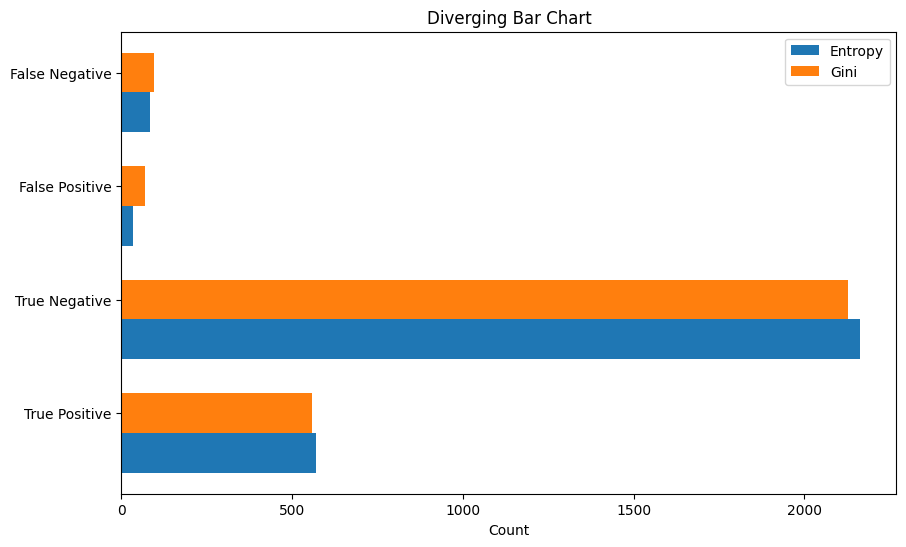

In [172]:
#Plotting a diverging bar chart of the metrics for both criteria
criteria = ["Entropy","Gini"]
categories = ["True Positive","True Negative", "False Positive", "False Negative"]
values = np.array([[TPE,TPG],[TNE,TNG],[FPE,FPG],[FNE,FNG]])
fig, ax = plt.subplots(figsize = (10,6))
width = 0.35
x = np.arange(len(categories))
for i, criterion in enumerate(criteria):
  ax.barh(x+i*width,values[:,i],width,label=criterion)

ax.set_xlabel('Count')
ax.set_title("Diverging Bar Chart")
ax.set_yticks(x+width)
ax.set_yticklabels(categories)
ax.legend(loc="upper right")
plt.show()

**4. FEATURE IMPORTANCE VISUALIZATION**

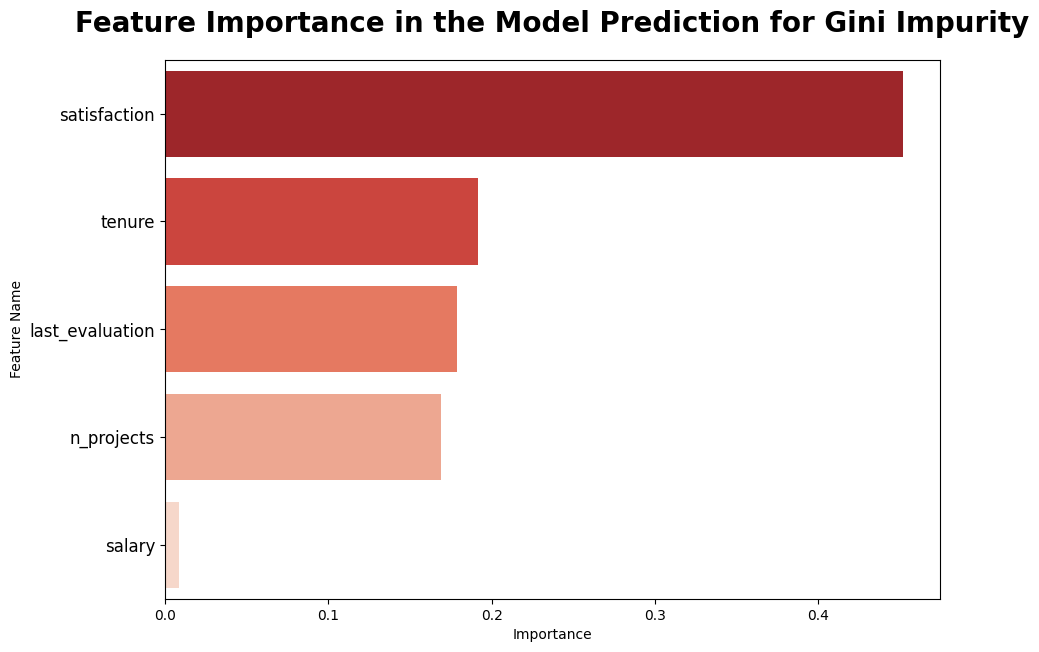

In [192]:
imp_df = pd.DataFrame({"Feature Name":x_train.columns,
                       "Importance":dtreeg.feature_importances_})
features = imp_df.sort_values(by="Importance",ascending=False)

plt.figure(figsize=(10,7))
sns.barplot(x="Importance", y="Feature Name", data=features, palette="Reds_r")
plt.title("Feature Importance in the Model Prediction for Gini Impurity", fontweight="black", size=20, pad=20)
plt.yticks(size=12)
plt.show()

We can see that Satisfaction is the most important feature for training the model using Gini Impurity

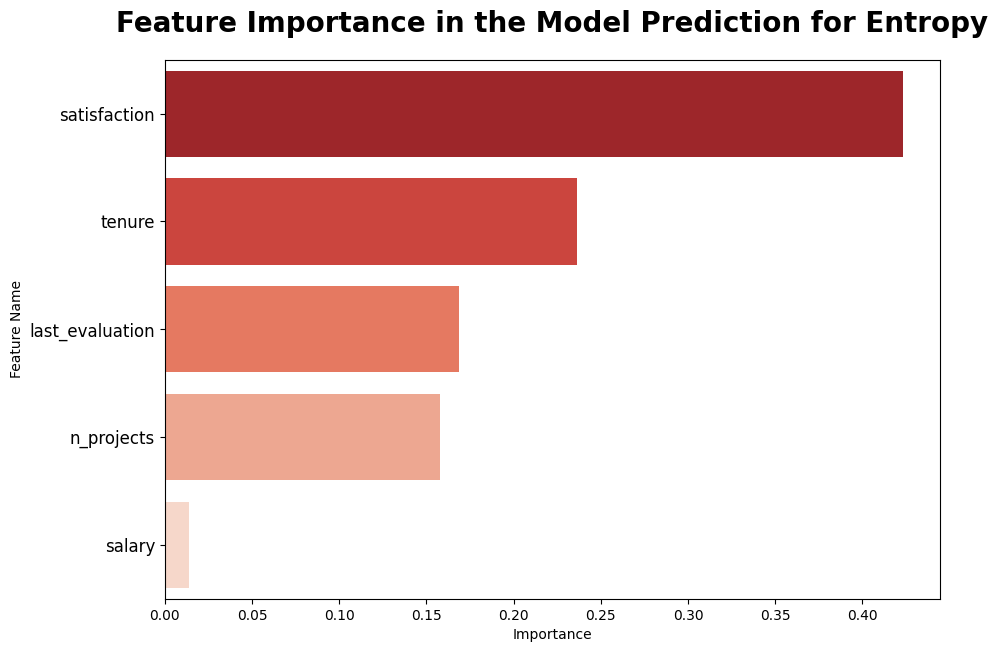

In [193]:
imp_df = pd.DataFrame({"Feature Name":x_train.columns,
                       "Importance":dtree_e.feature_importances_})
features = imp_df.sort_values(by="Importance",ascending=False)

plt.figure(figsize=(10,7))
sns.barplot(x="Importance", y="Feature Name", data=features, palette="Reds_r")
plt.title("Feature Importance in the Model Prediction for Entropy", fontweight="black", size=20, pad=20)
plt.yticks(size=12)
plt.show()

In this visualization, Satisfaction is the most important feature for training the model using Entropy